# Read CSV

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data files and processing the file in chunks
loan_data = pd.read_csv('loan.csv', low_memory=False)


# Displaying the first few rows of each file to understand the structure
loan_data_head = loan_data.head()


loan_data_head


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Univariate Analysis

Loan Amount Metrics:
 count    39717.00
mean     11219.44
std       7456.67
min        500.00
25%       5500.00
50%      10000.00
75%      15000.00
max      35000.00
Name: loan_amnt, dtype: float64


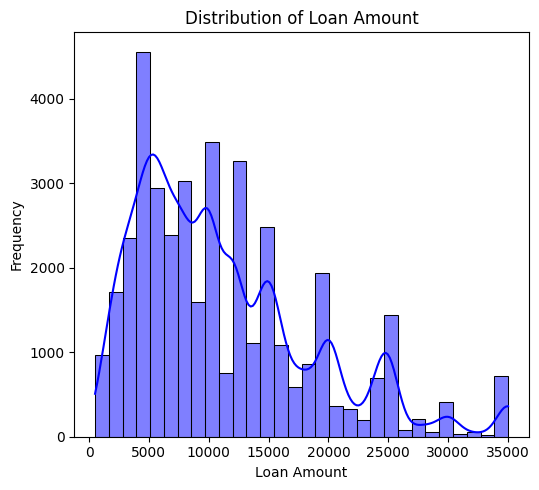

In [39]:
# Univariate Analysis: Distribution of loan amount

# Calculating metrics for loan amount distribution
loan_amount_metrics = loan_data['loan_amnt'].describe().round(2)
print("Loan Amount Metrics:\n", loan_amount_metrics)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(loan_data['loan_amnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()



Interest Rate Metrics:
 count    39717.00
mean        12.02
std          3.72
min          5.42
25%          9.25
50%         11.86
75%         14.59
max         24.59
Name: int_rate, dtype: float64


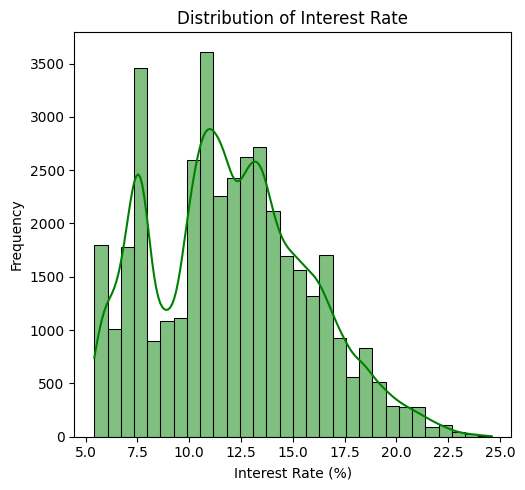

In [40]:
# Univariate Analysis: Distribution of interest rate

# Converting 'int_rate' to numeric for analysis
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype('float')

# Calculating metrics for interest rate distribution
interest_rate_metrics = loan_data['int_rate'].describe().round(2)

print("\nInterest Rate Metrics:\n", interest_rate_metrics)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.histplot(loan_data['int_rate'], bins=30, kde=True, color='green')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


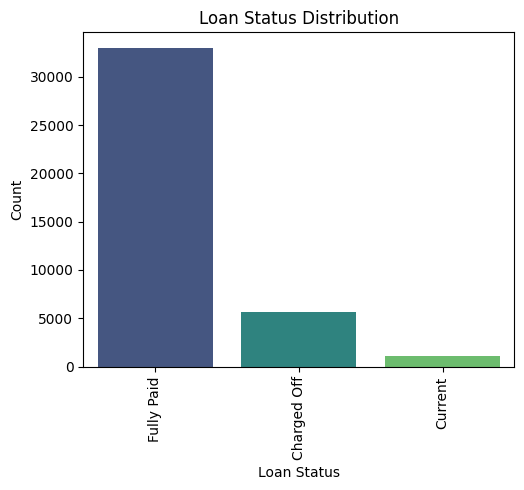

In [5]:
# Univariate Analysis: Distribution of loan status

# The distribution of loan statuses
loan_status_counts = loan_data['loan_status'].value_counts()
print(loan_status_counts)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 3)
loan_status_counts = loan_data['loan_status'].value_counts()
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, hue=loan_status_counts.index, palette='viridis', legend=False)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

# Segmented Univariate Analysis

               count          mean          std     min      25%      50%  \
loan_status                                                                 
Charged Off   5627.0  12104.385108  8085.732038   900.0   5600.0  10000.0   
Current       1140.0  17053.991228  8651.052316  1000.0  12000.0  15825.0   
Fully Paid   32950.0  10866.455994  7199.629493   500.0   5200.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  16500.0  35000.0  
Current      23000.0  35000.0  
Fully Paid   15000.0  35000.0  


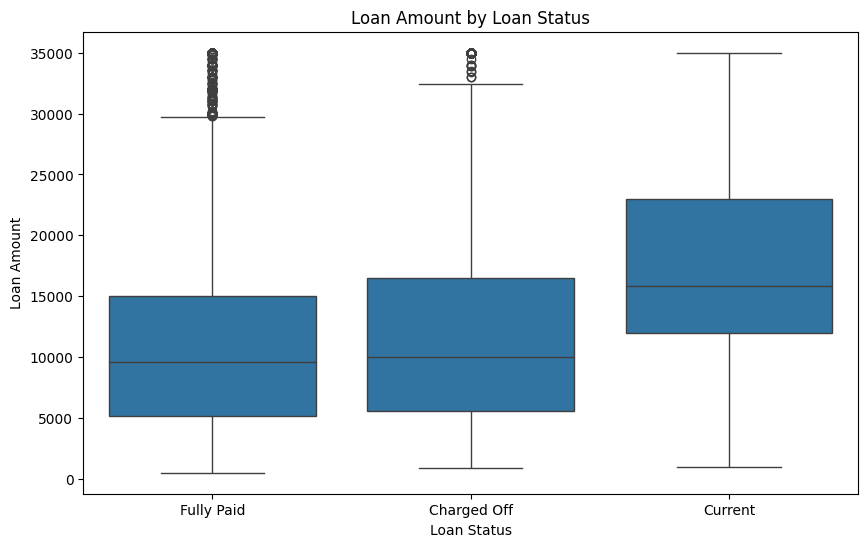

In [6]:
# Loan Amount by Loan Status
loan_status_groups = loan_data.groupby('loan_status')

loan_amount_by_status = loan_status_groups['loan_amnt'].describe().round(2)
print(loan_amount_by_status)


plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

               count   mean   std   min    25%    50%    75%    max
loan_status                                                        
Charged Off   5627.0  13.82  3.65  5.42  11.31  13.61  16.40  24.40
Current       1140.0  15.03  3.60  6.00  11.99  14.65  17.99  24.59
Fully Paid   32950.0  11.61  3.60  5.42   8.49  11.49  13.99  24.11


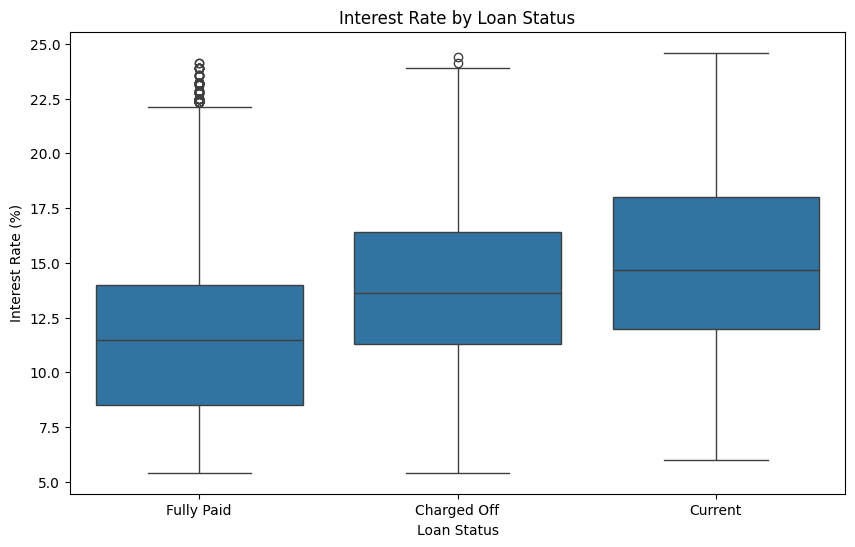

In [15]:
# Interest Rate by Loan Status
interest_rate_by_status = loan_status_groups['int_rate'].describe().round(2)
print(interest_rate_by_status)

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data)
plt.title('Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()

# Bivariate Analysis

Interest Rate Descriptive Statistics by Loan Status:
               count   mean   std   min    25%    50%    75%    max
loan_status                                                        
Charged Off   5627.0  13.82  3.65  5.42  11.31  13.61  16.40  24.40
Current       1140.0  15.03  3.60  6.00  11.99  14.65  17.99  24.59
Fully Paid   32950.0  11.61  3.60  5.42   8.49  11.49  13.99  24.11


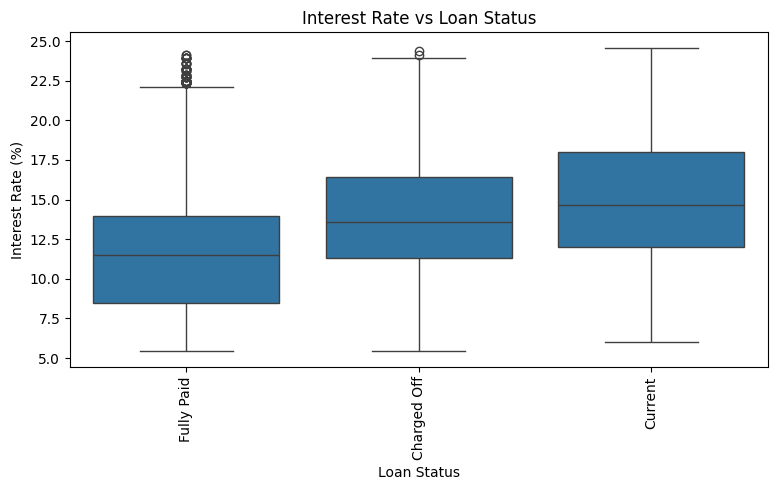

In [16]:
# Bivariate Analysis: Interest Rate vs Loan Status

int_rate_stats = loan_data.groupby('loan_status')['int_rate'].describe().round(2)
print("Interest Rate Descriptive Statistics by Loan Status:")
print(int_rate_stats)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status', y='int_rate', data=loan_data)
plt.title('Interest Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()


Loan Amount Descriptive Statistics by Loan Status:
               count      mean      std     min      25%      50%      75%  \
loan_status                                                                  
Charged Off   5627.0  12104.39  8085.73   900.0   5600.0  10000.0  16500.0   
Current       1140.0  17053.99  8651.05  1000.0  12000.0  15825.0  23000.0   
Fully Paid   32950.0  10866.46  7199.63   500.0   5200.0   9600.0  15000.0   

                 max  
loan_status           
Charged Off  35000.0  
Current      35000.0  
Fully Paid   35000.0  


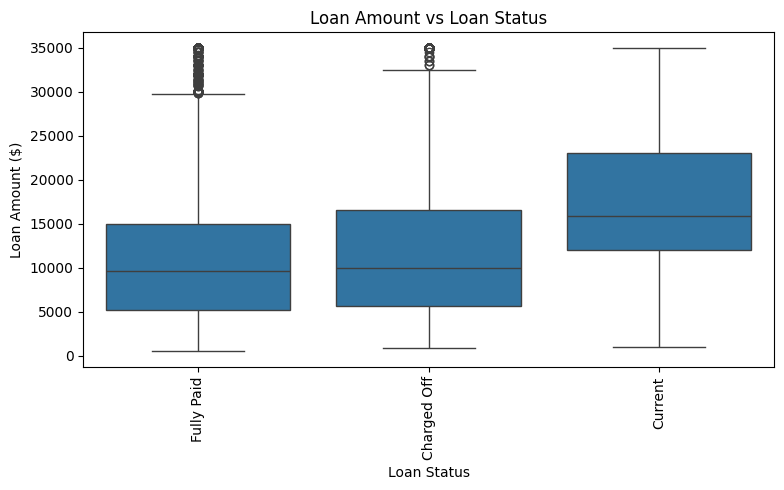

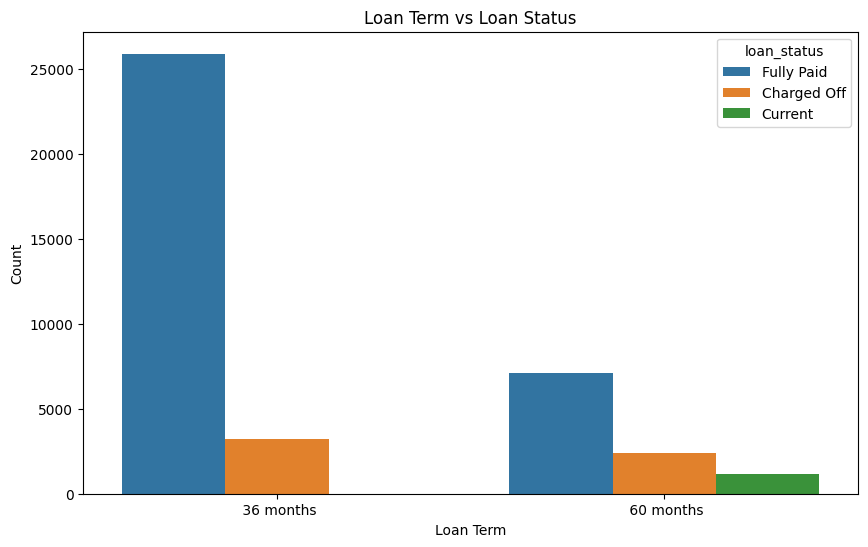

In [18]:
# Bivariate Analysis: Loan Amount vs Loan Status

loan_amnt_stats = loan_data.groupby('loan_status')['loan_amnt'].describe().round(2)
print("\nLoan Amount Descriptive Statistics by Loan Status:")
print(loan_amnt_stats)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 2)
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()


# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=loan_data)
plt.title('Loan Term vs Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()


Loan Term vs Loan Status Counts:
loan_status  Charged Off  Current  Fully Paid
term                                         
 36 months          3227        0       25869
 60 months          2400     1140        7081


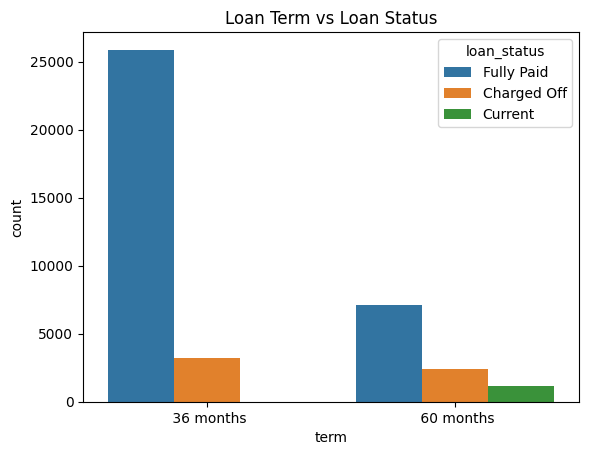

In [17]:
# Loan Term vs Loan Status
term_stats = loan_data.groupby(['term', 'loan_status']).size().unstack().fillna(0).astype(int)
print("\nLoan Term vs Loan Status Counts:")
print(term_stats)

sns.countplot(x='term', hue='loan_status', data=loan_data)
plt.title('Loan Term vs Loan Status')
plt.show()


Annual Income Descriptive Statistics by Loan Status:
               count      mean       std     min       25%      50%      75%  \
loan_status                                                                    
Charged Off   5627.0  62427.30  47776.01  4080.0  37000.00  53000.0  75000.0   
Current       1140.0  75430.67  46775.43  9960.0  47475.00  65000.0  90000.0   
Fully Paid   32950.0  69862.50  66562.25  4000.0  41132.75  60000.0  84000.0   

                   max  
loan_status             
Charged Off  1250000.0  
Current       650000.0  
Fully Paid   6000000.0  


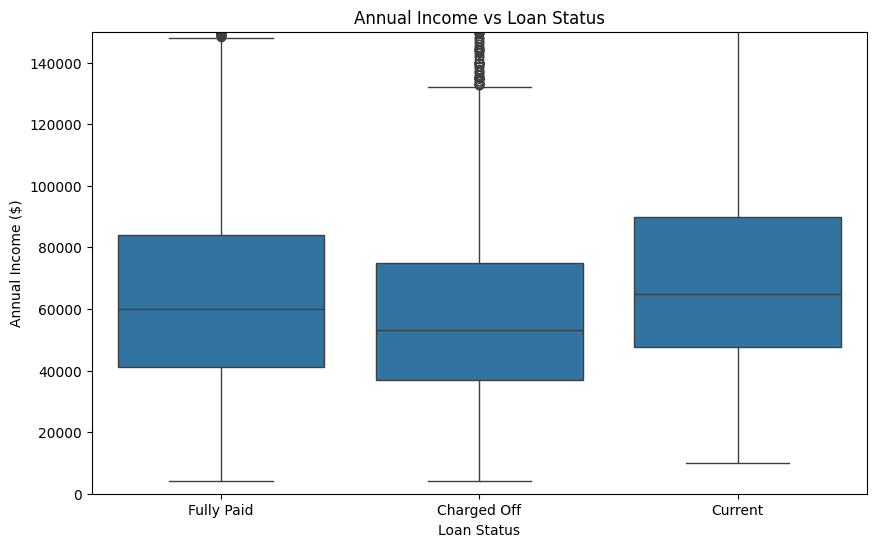

In [20]:
# Annual Income vs Loan Status

# Calculate descriptive statistics for annual income segmented by loan status
annual_inc_stats = loan_data.groupby('loan_status')['annual_inc'].describe().round(2)
print("\nAnnual Income Descriptive Statistics by Loan Status:")
print(annual_inc_stats)


# Plotting the boxplot for Annual Income vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data)
plt.title('Annual Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income ($)')
plt.ylim(0, 150000)  # Limiting the y-axis for better visualization
plt.show()


        grade loan_status
count   39717       39717
unique      7           3
top         B  Fully Paid
freq    12020       32950


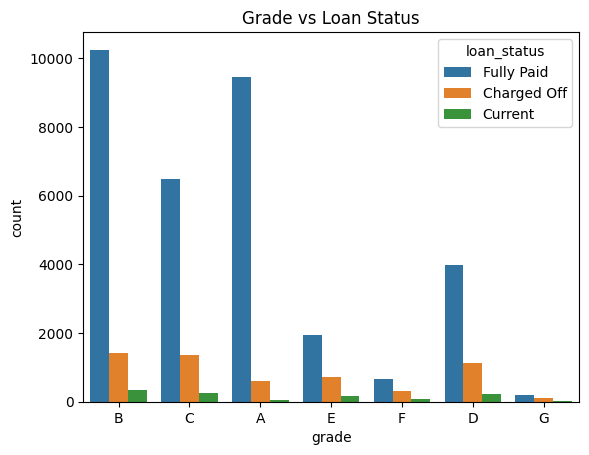

In [23]:
# Grade vs Loan Status
print(loan_data[['grade', 'loan_status']].describe(include='all'))

# Grade vs Loan Status plot
sns.countplot(x='grade', hue='loan_status', data=loan_data)
plt.title('Grade vs Loan Status')
plt.show()

               count   mean   std  min   25%    50%    75%    max
loan_status                                                      
Charged Off   5627.0  14.00  6.59  0.0  9.05  14.29  19.29  29.85
Current       1140.0  14.75  6.71  0.0  9.75  15.05  20.04  29.95
Fully Paid   32950.0  13.15  6.68  0.0  7.98  13.20  18.39  29.99


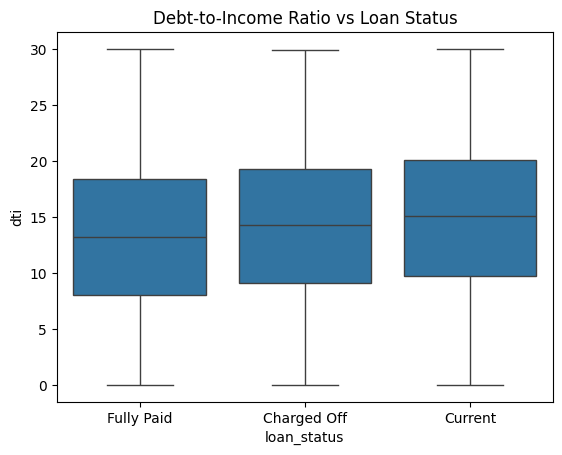

In [25]:
# Debt-to-Income Ratio vs Loan Status
# Print descriptive statistics for Debt-to-Income Ratio grouped by Loan Status
print(loan_data.groupby('loan_status')['dti'].describe().round(2))

# Debt-to-Income Ratio vs Loan Status plot
sns.boxplot(x='loan_status', y='dti', data=loan_data)
plt.title('Debt-to-Income Ratio vs Loan Status')
plt.show()

       loan_amnt  int_rate
count   39717.00  39717.00
mean    11219.44     12.02
std      7456.67      3.72
min       500.00      5.42
25%      5500.00      9.25
50%     10000.00     11.86
75%     15000.00     14.59
max     35000.00     24.59


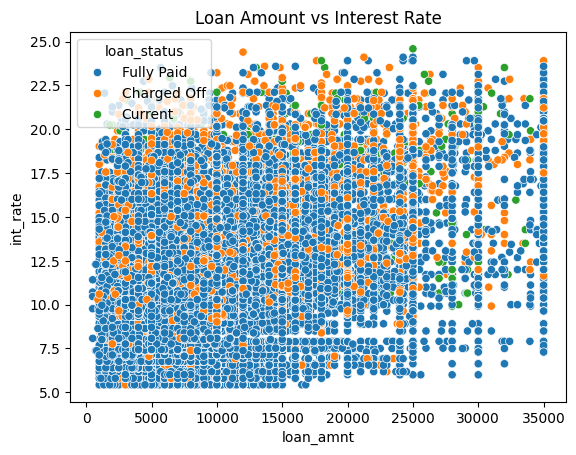

In [27]:
# Loan Amount vs Interest Rate
# Print descriptive statistics for Loan Amount and Interest Rate
print(loan_data[['loan_amnt', 'int_rate']].describe().round(2))

# Loan Amount vs Interest Rate plot
sns.scatterplot(x='loan_amnt', y='int_rate', hue='loan_status', data=loan_data)
plt.title('Loan Amount vs Interest Rate')
plt.show()

             count unique        top  freq
loan_status                               
Charged Off   5399     11  10+ years  1331
Current       1098     11  10+ years   391
Fully Paid   32145     11  10+ years  7157


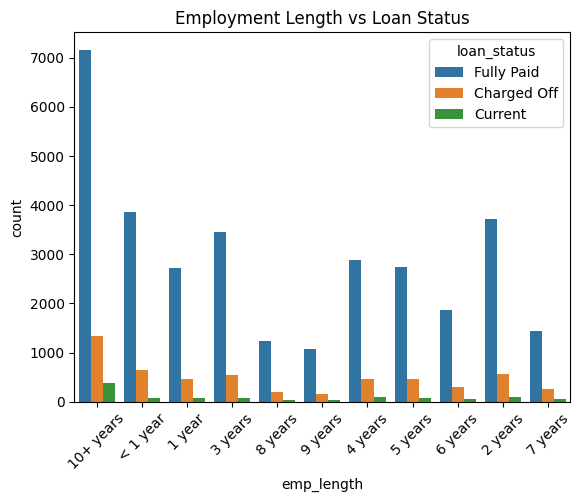

In [29]:
# Employment Length vs Loan Status
# Print descriptive statistics for Employment Length grouped by Loan Status
print(loan_data.groupby('loan_status')['emp_length'].describe(include='all'))

# Employment Length vs Loan Status plot
sns.countplot(x='emp_length', hue='loan_status', data=loan_data)
plt.title('Employment Length vs Loan Status')
plt.xticks(rotation=45)
plt.show()

             count unique       top   freq
loan_status                               
Charged Off   5627      4      RENT   2839
Current       1140      3  MORTGAGE    638
Fully Paid   32950      5      RENT  15641


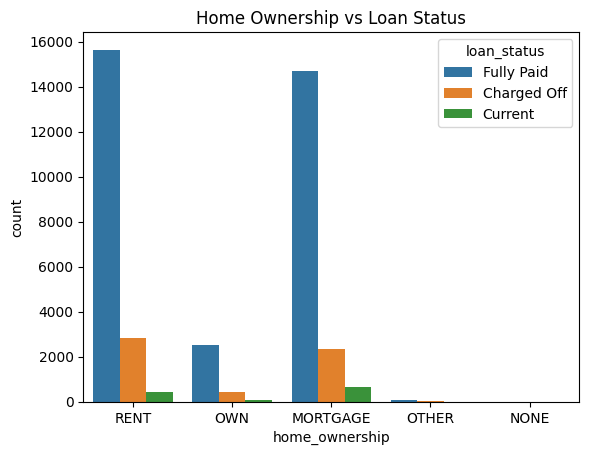

In [30]:
# Home Ownership vs Loan Status
# Print descriptive statistics for Home Ownership grouped by Loan Status
print(loan_data.groupby('loan_status')['home_ownership'].describe(include='all'))

# Home Ownership vs Loan Status plot
sns.countplot(x='home_ownership', hue='loan_status', data=loan_data)
plt.title('Home Ownership vs Loan Status')
plt.show()

             count unique                 top   freq
loan_status                                         
Charged Off   5627     14  debt_consolidation   2767
Current       1140     13  debt_consolidation    586
Fully Paid   32950     14  debt_consolidation  15288


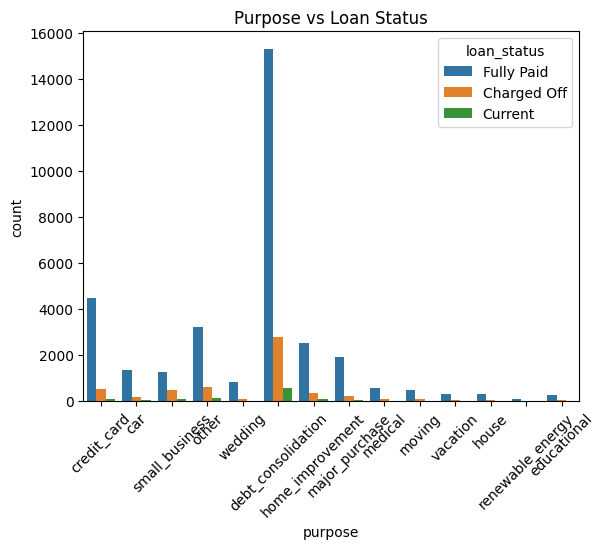

In [31]:
# Purpose vs Loan Status
# Print descriptive statistics for Purpose grouped by Loan Status
print(loan_data.groupby('loan_status')['purpose'].describe(include='all'))

# Purpose vs Loan Status plot
sns.countplot(x='purpose', hue='loan_status', data=loan_data)
plt.title('Purpose vs Loan Status')
plt.xticks(rotation=45)
plt.show()

               count      mean       std  min  25%  50%   75%   max
loan_status                                                        
Charged Off   5627.0  9.178070  4.525937  2.0  6.0  8.0  12.0  38.0
Current       1140.0  9.936842  4.308704  2.0  7.0  9.0  12.0  32.0
Fully Paid   32950.0  9.292049  4.379854  2.0  6.0  9.0  12.0  44.0


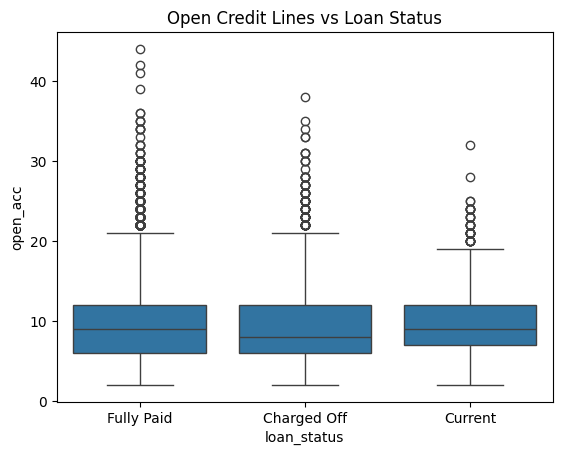

In [32]:
# Open Credit Lines vs Loan Status
# Print descriptive statistics for Open Credit Lines grouped by Loan Status
print(loan_data.groupby('loan_status')['open_acc'].describe())

# Open Credit Lines vs Loan Status plot
sns.boxplot(x='loan_status', y='open_acc', data=loan_data)
plt.title('Open Credit Lines vs Loan Status')
plt.show()

               count       mean        std  min   25%   50%   75%   max
loan_status                                                            
Charged Off   5627.0  21.427581  11.447427  2.0  13.0  20.0  28.0  74.0
Current       1140.0  23.313158  10.483115  3.0  16.0  22.0  30.0  63.0
Fully Paid   32950.0  22.159393  11.418927  2.0  14.0  20.0  29.0  90.0


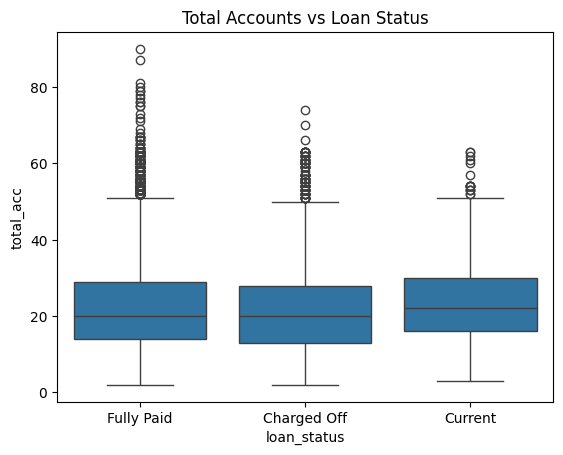

In [33]:
# Total Accounts vs Loan Status
# Print descriptive statistics for Total Accounts grouped by Loan Status
print(loan_data.groupby('loan_status')['total_acc'].describe())

# Total Accounts vs Loan Status plot
sns.boxplot(x='loan_status', y='total_acc', data=loan_data)
plt.title('Total Accounts vs Loan Status')
plt.show()